In [1]:
import utils
import pandas as pd
import numpy as np

from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA
import umap

import matplotlib.pyplot as plt
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'png'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [2]:
q_df = pd.read_csv('../data/train.csv')

In [27]:
questions = [
    'How can I see if my boyfriend is on a dating website?',
    'Where can I get funding for my idea?',
    'What are the top 200 ranking signals Google uses?',
    "I'm 15 right now. What can I do to become a millionaire by my 20s?"
]

In [28]:
q_df[q_df.question1.isin(questions)]

,id,qid1,qid2,question1,question2,is_duplicate
49281,49281,87724,87725,How can I see if my boyfriend is on a dating w...,How can I see what apps and dating sites my hu...,1
49805,49805,64236,88601,Where can I get funding for my idea?,How can you get VCs to fund you if you just ha...,1
107768,107768,64236,156975,Where can I get funding for my idea?,"I have an idea for a start up, I need funding ...",1
120494,120494,64236,189931,Where can I get funding for my idea?,How can I find funding for a startup business?,1
165341,165341,256759,201249,What are the top 200 ranking signals Google uses?,What are Google's 200 ranking factors?,1
183102,183102,87724,110077,How can I see if my boyfriend is on a dating w...,How do you find out if your boyfriend is on da...,1
240221,240221,64236,17317,Where can I get funding for my idea?,How should I go about getting funding for my i...,1
240888,240888,64236,102278,Where can I get funding for my idea?,How do I get funding for my startup idea befor...,1
270723,270723,64236,13131,Where can I get funding for my idea?,How do I get to just tell investors about my s...,1
318307,318307,64236,48491,Where can I get funding for my idea?,How do I get seed funding pre product?,1


In [29]:
q_ids = [
    49281,
    120494,
    165341,
    389121
]

In [30]:
q_df[q_df.id.isin(q_ids)]

,id,qid1,qid2,question1,question2,is_duplicate
49281,49281,87724,87725,How can I see if my boyfriend is on a dating w...,How can I see what apps and dating sites my hu...,1
120494,120494,64236,189931,Where can I get funding for my idea?,How can I find funding for a startup business?,1
165341,165341,256759,201249,What are the top 200 ranking signals Google uses?,What are Google's 200 ranking factors?,1
389121,389121,501430,521581,I'm 15 right now. What can I do to become a mi...,I'm a 15 year old teenager. What can I do to p...,1


In [91]:
sample = q_df[q_df.id.isin(q_ids)]
sample = utils.apply_lemma(utils.clean_questions(utils.stack_questions(sample)))
sample

['boyfriend dating website',
 'app date site husband use',
 'fund idea',
 'find funding startup business',
 ' rank signal google use',
 'google  ranking factor',
 ' right millionaire',
 ' year old teenager prepare great entrepreneur']

In [56]:
def tsne_plot():
    "Creates and TSNE model and plots it"
    labels = set()
    tokens = []
    token_colors = []
    colors = ['b', 'g', 'r', 'c']
    counter = 0
    for doc in utils.nlp.pipe(sample[:2], disable=['parser', 'ner']):
#         vecs.append([tok.vector for tok in doc]) # accounts for white space vector of 0
        for tok in doc:
            if tok.text not in labels:
                token_colors.append(colors[counter])
                tokens.append(tok.vector)
                labels.add(tok.text)
        counter += 1
#     print(token_colors)

#     for word in model.wv.vocab: ## need to loop through the vectors and assign to tokens
#         tokens.append(model[word])
#         labels.append(word)
    labels = list(labels)
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i], c=token_colors[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.savefig('../docs/img/tsne_plt.png', dpi=300)
    plt.show()


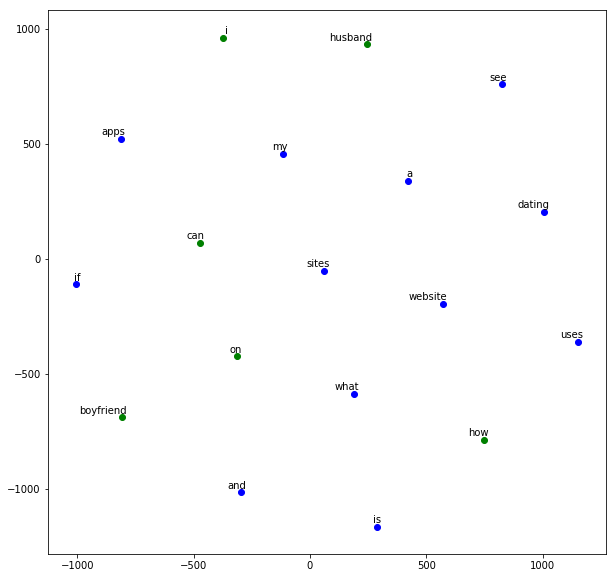

In [57]:
tsne_plot()

In [161]:
from adjustText import adjust_text

In [162]:
def pca_plot(words):
    """
    
    Parameters:
    ------------
    words: list
        List of words to highlight in the PCA plot, all other words will be greyed out.
        
    """
    "Creates and TSNE model and plots it"
    labels = set()
    tokens = []
    token_colors = []
    colors = ['b', 'g', 'r', 'c']
    counter = 0
    for doc in utils.nlp.pipe(q_all[:100], disable=['parser', 'ner']):
#         vecs.append([tok.vector for tok in doc]) # accounts for white space vector of 0
        for tok in doc:
            if tok.text not in labels:
#                 token_colors.append(colors[counter])
                tokens.append(tok.vector)
                labels.add(tok.text)
        counter += 1
#     print(token_colors)

#     for word in model.wv.vocab: ## need to loop through the vectors and assign to tokens
#         tokens.append(model[word])
#         labels.append(word)
    labels = list(labels)
    
    # build a list of colors
    label_colors = ['tab:gray' if w not in words else 'r' for w in labels]
    label_alpha = [0.3 if w not in words else 1 for w in labels]

    tsne_model = MDS(n_components=2, dissimilarity='precomputed')
    cosine_distance = metrics.pairwise.cosine_distances(tokens)
#     print(cosine_distance[:10])
    new_values = tsne_model.fit_transform(cosine_distance)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])#, c=label_colors[i])
#         plt.annotate(labels[i], 
#                      xy=(x[i], y[i]),
#                      xytext=(5, 2),
#                      textcoords='offset points',
#                      ha='right',
#                      va='bottom')#,
#                     color = label_colors[i],
#                     alpha = label_alpha[i])
#     plt.savefig('../docs/img/pca_plt_mil_ent.png', dpi=300)
    texts =  [       plt.annotate(labels[i], 
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom') for i in range(len(x))
]
    adjust_text(texts)
    plt.show()


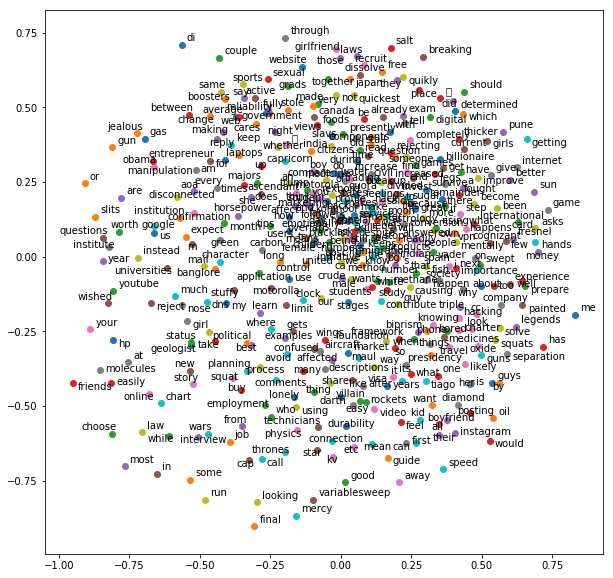

In [163]:
pca_plot(['millionaire', 'entrepreneur'])

In [134]:
from sklearn import metrics

In [ ]:
euclidean_distances()

In [85]:
def umap_plot():
    "Creates and TSNE model and plots it"
    labels = set()
    tokens = []
    token_colors = []
    colors = ['b', 'g', 'r', 'c']
    counter = 0
    for doc in utils.nlp.pipe(q_all[:1000], disable=['parser', 'ner']):
#         vecs.append([tok.vector for tok in doc]) # accounts for white space vector of 0
        for tok in doc:
            if tok.text not in labels:
#                 token_colors.append(colors[counter])
                tokens.append(tok.vector)
                labels.add(tok.text)
        counter += 1
#     print(token_colors)

#     for word in model.wv.vocab: ## need to loop through the vectors and assign to tokens
#         tokens.append(model[word])
#         labels.append(word)
    labels = list(labels)
    tsne_model = umap.UMAP(n_neighbors=6)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.savefig('../docs/img/umap_plt.png', dpi=300)
    plt.show()


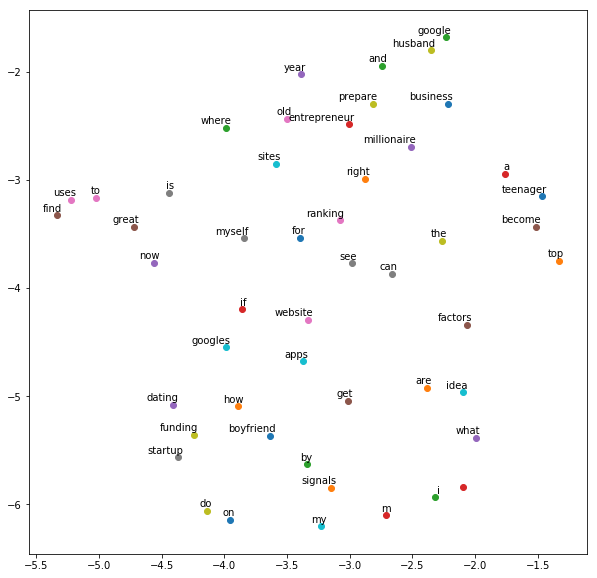

In [86]:
umap_plot()

In [67]:
# all questions
train_df = utils.load('train')
q_all = utils.clean_questions(utils.stack_questions(train_df))

In [76]:
from spacy import displacy

In [80]:
# nlp = spacy.load('en')
doc = utils.nlp(sample[0])
displacy.render(doc, style='dep', jupyter=True)

### Need min/max/avg distances for each question

### Need AUC curves and confusion matrix for GB model

In [ ]:
xgb_model = utils.load

## Parallel Coordinates

In [147]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [150]:
utils.add_min_max_avg_distance_features(sample)

array([[  7.50643285,   8.41845929,   7.98459603,   0.54771085,
          0.8859119 ,   0.70161169, 102.73735006, 112.48098179,
        109.21934865],
       [  6.40066932,   9.16536348,   7.60443277,   0.59135677,
          0.9102408 ,   0.72907539,  88.94465558, 118.72917165,
        103.10254319],
       [  7.01280849,   7.01280849,   7.01280849,   0.66233213,
          0.66233213,   0.66233213,  95.53159665,  95.53159665,
         95.53159665],
       [  6.37088154,   8.06568347,   7.46527747,   0.58294588,
          0.80521478,   0.68969053,  87.4338669 , 108.13480385,
        100.19572707],
       [  6.65134456,   9.3414926 ,   7.96379829,   0.63349389,
          0.89951245,   0.7623332 ,  93.3596137 , 126.90383392,
        109.20997797],
       [  7.0420113 ,   8.23805973,   7.63142973,   0.59096925,
          0.85204553,   0.71500322,  94.34263102, 114.96596832,
        105.60771516],
       [  7.28708213,   7.28708213,   7.28708213,   0.8030324 ,
          0.8030324 ,   0.8030

In [153]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [
    go.Parcoords(
        line = dict(color = 'blue'),
        dimensions = list([
            dict(range = [1,5],
                 constraintrange = [1,2],
                 label = 'Min cos', values = [1,4]),
            dict(range = [1.5,5],
                 tickvals = [1.5,3,4.5],
                 label = 'Max cos', values = [3,1.5]),
            dict(range = [1,5],
                 tickvals = [1,2,4,5],
                 label = 'Avg cos', values = [2,4],
                 ticktext = ['text 1', 'text 2', 'text 3', 'text 4']),
            dict(range = [1,5],
                 label = 'Min euc', values = [4,2])
        ])
    )
]

iplot(data)

In [3]:
q_dist = q_df.groupby(['qid1'])['is_duplicate'].mean().reset_index()
q_dist = q_dist[(q_dist.is_duplicate != 0) & (q_dist.is_duplicate != 1)]
q_dist.head()

,qid1,is_duplicate
26,45,0.250000
30,50,0.666667
34,57,0.850000
48,78,0.833333
57,91,0.333333


In [4]:
train_probs = utils.load('train_probs')

In [5]:
train_probs.shape

(606398,)

In [6]:
X_train = utils.load('X_train')

In [7]:
train_probs = train_probs[:train_probs.shape[0] // 2]

In [8]:
train_probs.shape

(303199,)

In [9]:
prob_df = pd.DataFrame(np.concatenate([np.array(X_train), train_probs.reshape(-1,1)], axis=1))
prob_df = prob_df.rename(columns={0:'id'})
prob_df.id = prob_df.id.astype(int)
prob_df.head()

,id,1,2,3
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.297089
1,1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.135976
2,2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0.21024
3,3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0.00103694
4,4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0.0751704


In [10]:
train_merge = q_df.merge(prob_df, on='id')
df_dup_question = train_merge.merge(q_dist, on='qid1')
df_dup_question = df_dup_question.rename(columns = {'is_duplicate_x':'is_duplicate', 
                                                    'is_duplicate_y':'is_dup_precent',
                                                     3: 'predict_proba'})
df_dup_question.head()

,id,qid1,qid2,question1,question2,is_duplicate,1,2,predict_proba,is_dup_precent
0,45,91,92,What is the quickest way to increase Instagram...,How can we increase our number of Instagram fo...,0,What is the quickest way to increase Instagram...,How can we increase our number of Instagram fo...,0.599397,0.333333
1,204381,91,307255,What is the quickest way to increase Instagram...,What are the quick ways to get Instagram Follo...,1,What is the quickest way to increase Instagram...,What are the quick ways to get Instagram Follo...,0.513224,0.333333
2,367446,91,90554,What is the quickest way to increase Instagram...,What is the best way to get real Instagram fol...,0,What is the quickest way to increase Instagram...,What is the best way to get real Instagram fol...,0.385754,0.333333
3,59,119,120,What are the best ways to learn French?,How do I learn french genders?,0,What are the best ways to learn French?,How do I learn french genders?,0.170872,0.500000
4,130843,119,64307,What are the best ways to learn French?,What is the quickest way to learn French?,1,What are the best ways to learn French?,What is the quickest way to learn French?,0.783342,0.500000


In [11]:
df_dup_question[df_dup_question.predict_proba >= 0.3].sort_values('predict_proba')

,id,qid1,qid2,question1,question2,is_duplicate,1,2,predict_proba,is_dup_precent
3222,53188,29691,94062,What is the best way to learn web designing?,How do I get started on learning web designing?,0,What is the best way to learn web designing?,How do I get started on learning web designing?,0.300032,0.250000
13251,285875,31558,406360,Which is the best digital marketing company in...,Which is the best digital marketing company to...,0,Which is the best digital marketing company in...,Which is the best digital marketing company to...,0.30004,0.400000
18763,240830,352729,352730,How is the Samsung Galaxy S7 edge?,Does Samsung Galaxy S7 edge need a protective ...,0,How is the Samsung Galaxy S7 edge?,Does Samsung Galaxy S7 edge need a protective ...,0.300065,0.666667
19862,293065,203465,414777,How do I prepare for GATE CSE 2018?,How do I prepare for GATE CSE 2016?,0,How do I prepare for GATE CSE 2018?,How do I prepare for GATE CSE 2016?,0.300115,0.250000
5986,32568,59931,59932,What are all the All India rank 1s in IIT - JE...,What are all the JEE toppers doing now?,1,What are all the All India rank 1s in IIT - JE...,What are all the JEE toppers doing now?,0.300196,0.500000
8639,55391,97650,97651,How many girls loose virginity before marriage?,How many girls are virgin before marriage?,0,How many girls loose virginity before marriage?,How many girls are virgin before marriage?,0.300313,0.500000
10610,186313,128943,284207,How do you motivate yourself to work hard?,How do you motivate yourself to work hard and ...,0,How do you motivate yourself to work hard?,How do you motivate yourself to work hard and ...,0.300342,0.800000
1433,6423,248,12584,What is the greatest mystery of all time?,What is the greatest mystery in earth?,1,What is the greatest mystery of all time?,What is the greatest mystery in earth?,0.300363,0.500000
16060,263335,250273,379864,What type off music do you listen?,When would you listen to specific types of music?,0,What type off music do you listen?,When would you listen to specific types of music?,0.300368,0.800000
14244,125782,202855,202856,Difference between sociology and psychology?,What is the difference between sociology and s...,0,Difference between sociology and psychology?,What is the difference between sociology and s...,0.300609,0.250000


In [12]:
base_question = df_dup_question[df_dup_question.qid1 == 71020].question1.values[0]
base_question

'How do I learn machine learning?'

In [23]:
# pos 0 = bad and pos 1 = good
compare_question = [df_dup_question[df_dup_question.qid1 == 71020].question2.values[9]]
compare_question.append('How do I become an astronaut?')
compare_question

['what steps should I follow to learn machine learning?',
 'How do I become an astronaut?']

In [24]:
base_features = utils.add_min_max_avg_distance_features(
        utils.clean_questions([base_question]))
base_features

array([[  4.17232192,   8.2992683 ,   6.42086466,   0.23170517,
          0.79069114,   0.5597662 ,  57.70175901, 110.78510621,
         86.21224801]])

In [25]:
compare_features = utils.add_min_max_avg_distance_features(
        utils.clean_questions(compare_question))
compare_features

array([[  4.15291281,   8.2992683 ,   6.18851809,   0.23170517,
          0.83613839,   0.5716477 ,  56.43200111, 110.78510621,
         83.99659584],
       [  4.30849117,   9.42425109,   6.8940949 ,   0.31031856,
          0.93784364,   0.66455693,  58.54252309, 127.33696975,
         94.41550932]])

In [26]:
comb_features = np.vstack([base_features, compare_features])

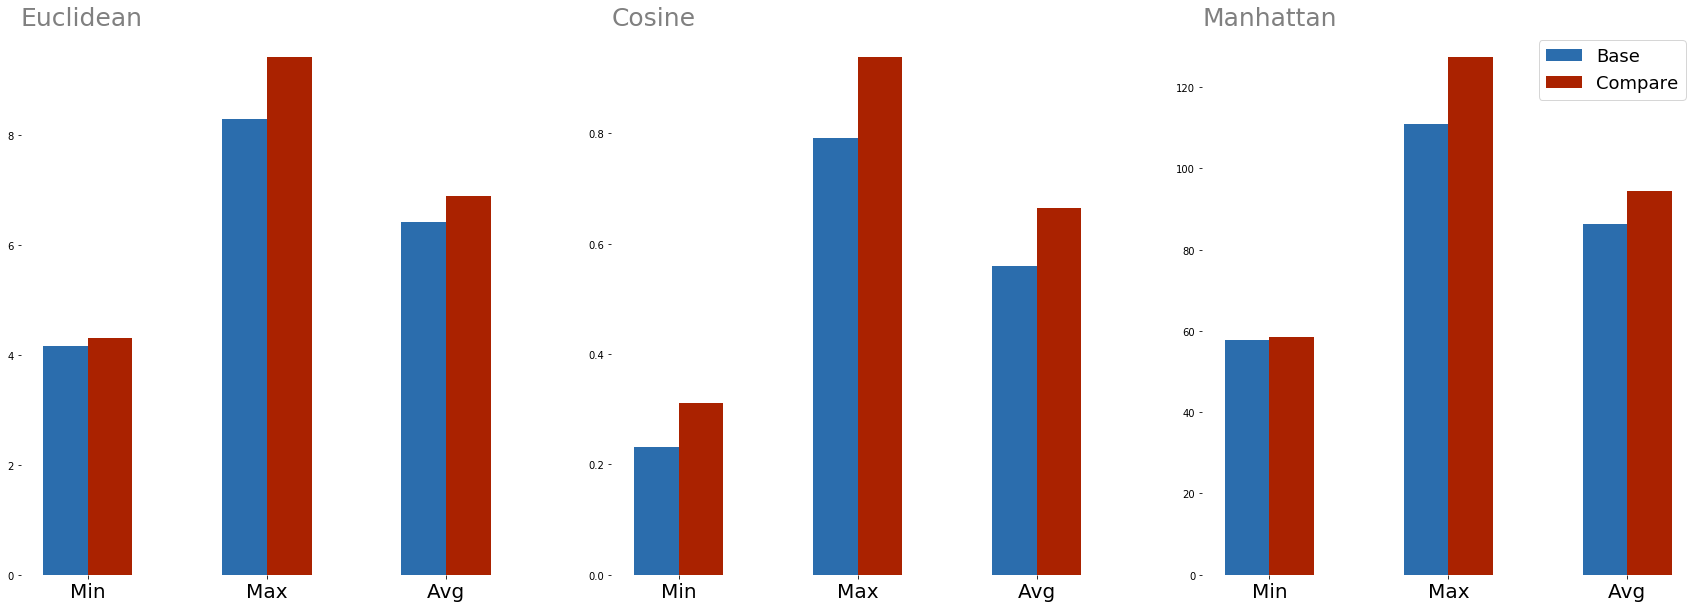

In [106]:
def plot_dist_diff(data, q1_idx, q2_idx, q3_idx=None):
    
    N = data.shape[1]

    q1_diff = data[q1_idx]
    q2_diff = data[q2_idx]
    q3_diff = data[q3_idx] if q3_idx is not None else None
#     if q3_idx is not None q3_diff = data[q3_idx]

    labels = ['Min', 'Max', 'Avg']#, 'min cos', 'max cos', 'avg cos', 'min manh', 'max manh', 'avg manh']
    titles = ['Euclidean', 'Cosine', 'Manhattan']

    fig, ax = plt.subplots(1, 3, figsize=(30, 10))

    
    ind = np.arange(N/3)    # the x locations for the groups
    width = 0.25       # the width of the bars
    
    for i in range(3):
        # plot the bars
        base = ax[i].bar(ind, q1_diff[i * 3 : (i+1) * 3], width, color='#2b6dad')
        compare = ax[i].bar(ind + width, q2_diff[i * 3 : (i+1) * 3], width, color='#aa2200')
        if q3_idx is not None:
            new = ax[i].bar(ind + width*2, 
                            q3_diff[i * 3 : (i+1) * 3], 
                            width, 
                            color='#307a3c', 
                            alpha=0.55, 
                            edgecolor='#307a3c',
                            linestyle='--',
                            linewidth=3)          
        
        # set the x ticks and labels
        grouped_length = ind + width / 2
        if q3_idx is not None:
            grouped_length = ind + width # width*2 (total width) / 2 (midpoint)
            
        ax[i].set_xticks(grouped_length)
        ax[i].set_xticklabels(labels, fontsize=20)
        
        # set the title
        ax[i].set_title(titles[i%3], fontsize=25, loc='left', color='gray')

        # remove the borders
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['bottom'].set_visible(False)
        ax[i].spines['left'].set_visible(False)

    # add legend to the last plot
    if q3_idx is not None:
        ax[2].legend(['Base', 'Compare', 'New'], fontsize=18)
    else:
        ax[2].legend(['Base', 'Compare'], fontsize=18)
    plt.show()
    
    
plot_dist_diff(comb_features, 0, 2)

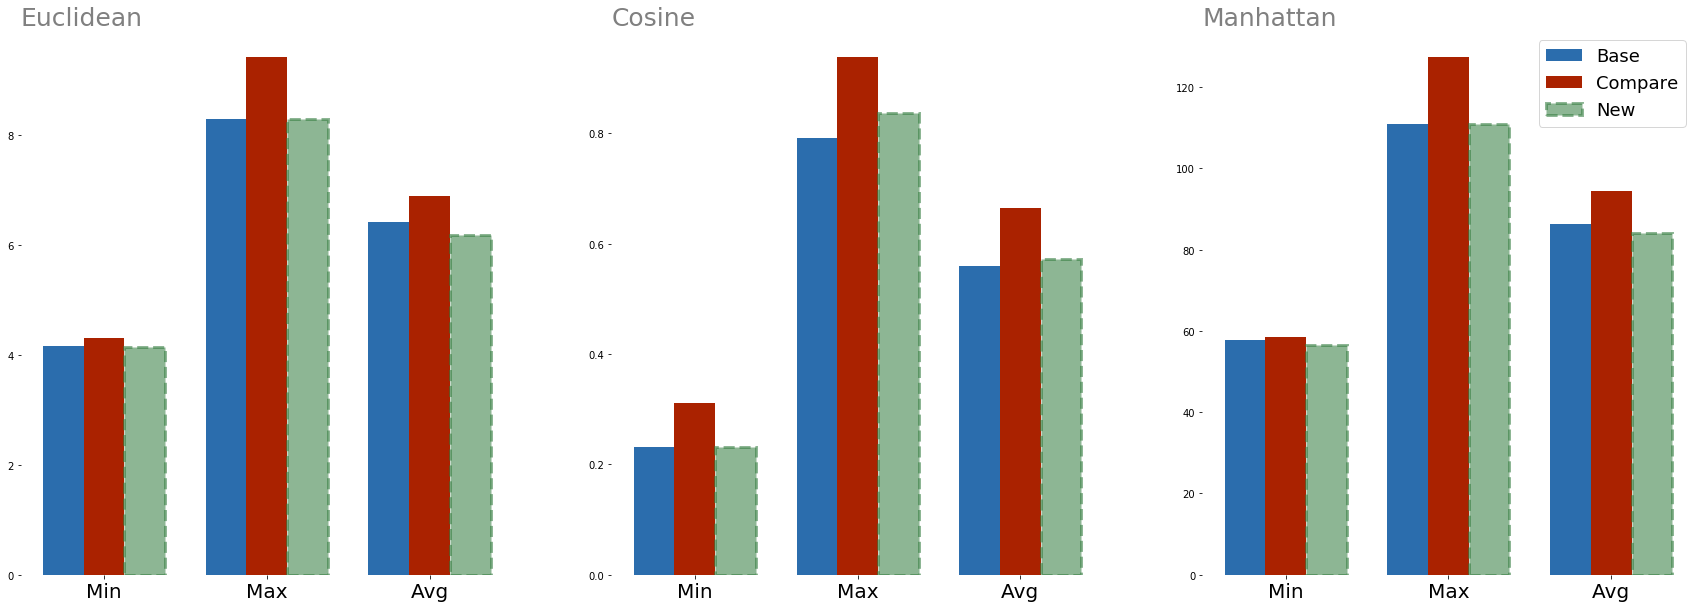

In [107]:
plot_dist_diff(comb_features, 0, 2, 1)

## Results

In [109]:
from sklearn import metrics

In [113]:
y_test = utils.load('y_test')
X_test_transform = utils.load('X_test_transform')
xgb = utils.load('xgb_ht_best_model_question_swapped')

In [117]:
test_probs = xgb.predict_proba(X_test_transform)[:, 1]

''

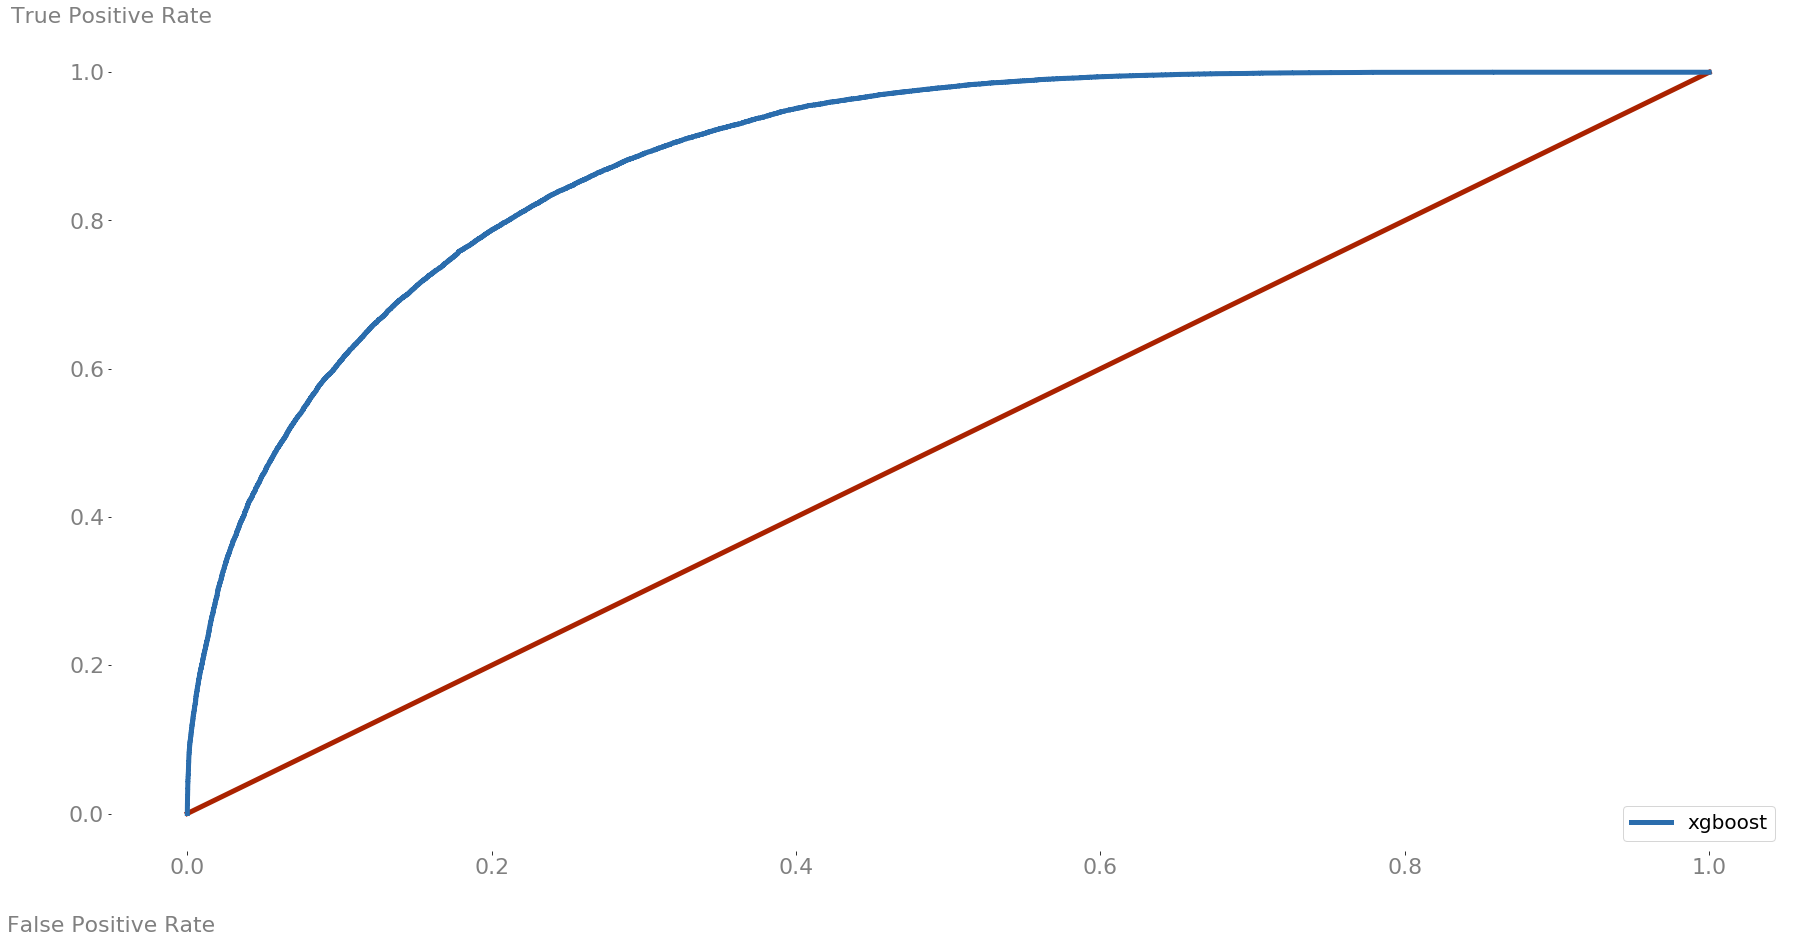

In [127]:
fpr_gb, tpr_gb, _ = metrics.roc_curve(y_test, test_probs)

fig, ax = plt.subplots(figsize=(30,15))

# Plotting our Baseline..
ax.plot([0,1],[0,1], color = '#aa2200', linewidth = 5)
ax.plot(fpr_gb, tpr_gb, label='xgboost', color = '#2b6dad', linewidth=5)
plt.legend(fontsize=20, loc='lower right')

# set the x labels
ax.set_xlabel('False Positive Rate', fontsize=22, color = 'gray')
ax.xaxis.set_label_coords(0, -0.08)

# set the y labels
ax.set_ylabel('True Positive Rate', fontsize=22, color = 'gray', rotation=0)
ax.yaxis.set_label_coords(0, 1.01)

# set title
# ax.set_title('ROC Curve', fontsize=30, color='gray', loc='left', pad=50)

# remove the borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# set x/y tick labels
for label in (ax.get_yticklabels() + ax.get_xticklabels()):
    label.set_fontsize(22)
    label.set_color('gray')
;

## Load results for Summary

In [128]:
results = utils.load('results')

In [133]:
sorted_results = results.sort_values('avg_auc', ascending=False)
sorted_results

,avg_accuracy,std_accuracy,avg_precision,std_precision,avg_recall,std_recall,avg_f1,std_f1,avg_auc,std_auc,avg_log_loss,std_log_loss
xgb_hypertuned,0.800791,0.001007,0.732020,0.001803,0.726379,0.001644,0.729187,0.001261,0.884651,0.000787,0.406161,0.001380
xgb_hypertuned_dup_features,0.788520,0.007471,0.714135,0.010980,0.712489,0.008232,0.713308,0.009598,0.873554,0.006916,0.420222,0.010238
rf_feat_eng_model_lemma_clean,0.783667,0.002260,0.708853,0.003681,0.702725,0.001666,0.705774,0.002658,0.868202,0.001148,0.436197,0.000640
ensemble_rf_xgb,0.779000,0.002740,0.697794,0.004357,0.708157,0.001912,0.702935,0.003148,0.863334,0.001438,0.441784,0.001107
xgb_feat_eng_incl_nums,0.767110,0.001576,0.682213,0.002621,0.701238,0.002695,0.691590,0.001899,0.851957,0.001192,0.450099,0.001675
feat_eng_model_lemma_clean,0.763927,0.002404,0.676166,0.003904,0.692113,0.001128,0.684044,0.002549,0.846923,0.001643,0.456929,0.001410
feat_eng_model_lemma_fix,0.744356,0.002107,0.664513,0.004333,0.621357,0.000901,0.642201,0.001609,0.822197,0.001710,0.488131,0.001342
feat_eng_model,0.743614,0.002021,0.664102,0.003502,0.618400,0.001553,0.640434,0.002281,0.821070,0.001428,0.489465,0.001141
ensemble_rf_xgb_cos_sim,0.738700,0.007359,0.661290,0.010948,0.612827,0.009669,0.636128,0.009994,0.819987,0.005193,0.493703,0.003901
lstm_Bidrectional,0.752968,0.000000,0.702084,0.000000,0.574900,0.000000,0.632158,0.000000,0.803540,0.000000,8.532243,0.000000


In [132]:
from tabulate import tabulate

In [138]:
print(tabulate(sorted_results.loc[:, ['avg_auc', 'avg_f1']], headers=['avg_auc', 'avg_f1'], tablefmt='pipe'))

|                                           |   avg_auc |   avg_f1 |
|:------------------------------------------|----------:|---------:|
| xgb_hypertuned                            |  0.884651 | 0.729187 |
| xgb_hypertuned_dup_features               |  0.873554 | 0.713308 |
| rf_feat_eng_model_lemma_clean             |  0.868202 | 0.705774 |
| ensemble_rf_xgb                           |  0.863334 | 0.702935 |
| xgb_feat_eng_incl_nums                    |  0.851957 | 0.69159  |
| feat_eng_model_lemma_clean                |  0.846923 | 0.684044 |
| feat_eng_model_lemma_fix                  |  0.822197 | 0.642201 |
| feat_eng_model                            |  0.82107  | 0.640434 |
| ensemble_rf_xgb_cos_sim                   |  0.819987 | 0.636128 |
| lstm_Bidrectional                         |  0.80354  | 0.632158 |
| lstm_dropout_50                           |  0.802315 | 0.638877 |
| lstm_LEMMA_dropout_20_lstm_layer_DO_20    |  0.801938 | 0.624349 |
| lstm_mvp                        